In [0]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading the dataset :

In [0]:
digit_dataset = keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

Normalizing the dataset

In [0]:
x_train = x_train/255.0
x_test = x_test/255.0

Visualising the data

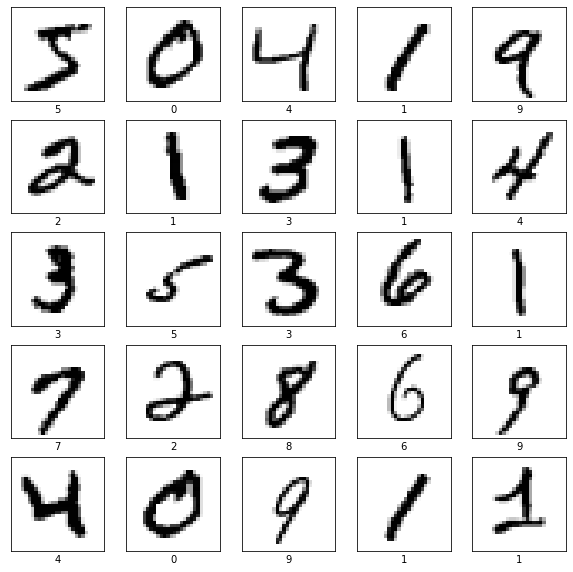

In [8]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Defining the model

In [0]:
def create_model():
  model = keras.Sequential(
    [
     keras.layers.Flatten(input_shape = (28, 28)),
     keras.layers.Dense(128, kernel_regularizer = keras.regularizers.l2(0.0001), activation = 'relu'),
     keras.layers.Dropout(0.2),
     keras.layers.Dense(128, kernel_regularizer = keras.regularizers.l2(0.0001), activation = 'relu'),
     keras.layers.Dense(10)
    ]
    )
  model.compile(optimizer = 'adam', 
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])
  return model
  

In [0]:
digit_recognition_model = create_model()

Training the model

In [16]:
digit_recognition_model.fit(x_train, y_train, epochs = 25)

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1150 - accuracy: 0.9805
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1127 - accuracy: 0.9810
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1127 - accuracy: 0.9813
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1108 - accuracy: 0.9813
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1138 - accuracy: 0.9812
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1105 - accuracy: 0.9815
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1104 - accuracy: 0.9818
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1101 - accuracy: 0.9817
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1076 - accuracy: 0.9826
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.108

Evaluating the model

In [18]:
test_loss, test_accuracy = digit_recognition_model.evaluate(x_test, y_test, verbose = 2)
print("Loss :",test_loss)
print("Accuracy :", test_accuracy)

313/313 - 0s - loss: 0.1275 - accuracy: 0.9790
Loss : 0.127485454082489
Accuracy : 0.9789999723434448


We got 97.90% accuracy on the test dataset!!

In [0]:
final_model = keras.Sequential([digit_recognition_model, keras.layers.Softmax()])

In [0]:
predictions = final_model.predict(x_test)

Predicting a single image

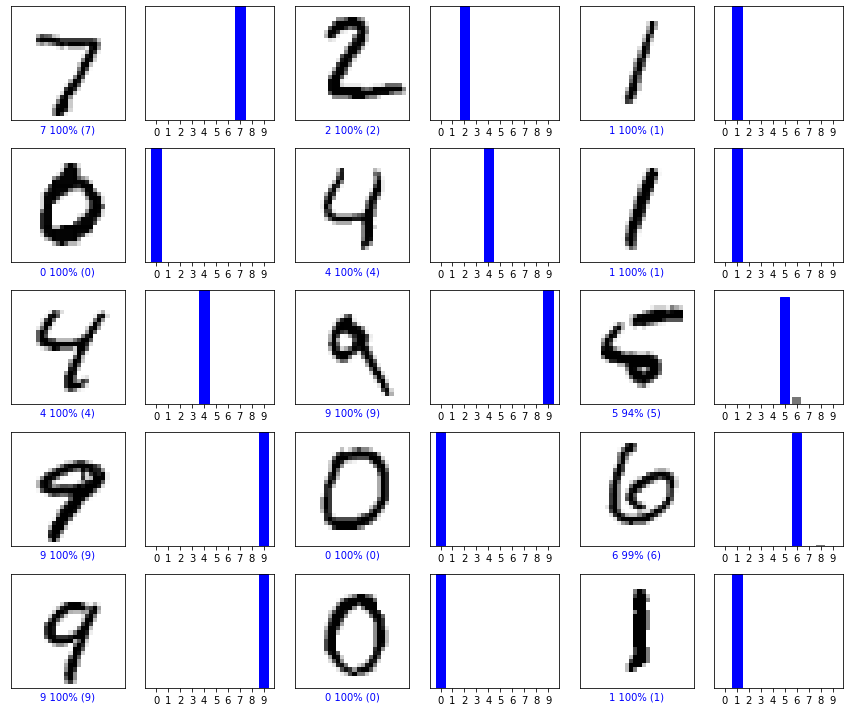

In [24]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

The actual number :  1
Our Prediction : 


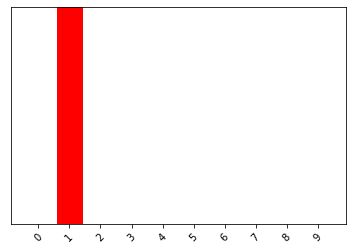

In [40]:
import random
img_index = random.randint(0, 10000)
img = x_test[img_index]
img = (np.expand_dims(img, 0))
predictions_single = final_model.predict(img)
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)
print("The actual number : ", y_test[img_index])
print("Our Prediction : ")